# Análisis y Evaluación de Modelos de Aprendizaje Automático
Maestría en Inteligencia Artificial Aplicada

Abraham Rincón Treviño  A00819677

Erick de Jesus Hernández Cerecedo A01066428

México, 25 de febrero de 2024

## Introducción
En este análisis se lleva a cabo la importación de datos y la preparación previa para la evaluación de modelos de aprendizaje automático. Se incluye la selección de características relevantes, la división del conjunto de datos en conjuntos de entrenamiento y prueba, y la evaluación inicial de un modelo de regresión logística.

## Importación de datos y preparación de los mismos
1. Comenzando con el proceso de la actividad se importaron los datos desde Spark mediante una consulta SQL.
2. Porsteriormente se transforman los datos a un Dataframe de Pandas para facilitar su análisis y manejo.
3. Visualización de los conjuntos de datos obtenidos.

In [ ]:
# Importar la clase SparkSession del módulo pyspark.sql
from pyspark.sql import SparkSession

# Crear una sesión de Spark
sesion = SparkSession.builder.appName("test").getOrCreate()

# Consulta para seleccionar todos los datos de la tabla "gold.info_l300.finished_data"
test = """
    SELECT * FROM gold.info_l300.finished_data
"""

# Ejecutar la consulta y almacenar los resultados en un DataFrame de Spark
data_frame = sesion.sql(test)

In [ ]:
# Importar el módulo pyspark.pandas con el alias ps
import pyspark.pandas as ps

# Convertir el DataFrame de Spark a un DataFrame de PySpark.Pandas
df = ps.DataFrame(data_frame)

In [ ]:
display(df)

Customer,arriveDifference,onTimeArrival,departureDifference,onTimeDeparture,avg_speed,distance
Mondelez Global LLC,-5512.0,true,12472.0,false,12.431646,455238.34
Mondelez Global LLC,-3428.0,true,18801.0,false,12.898618,883820.75
"Tesla, Inc",93212.0,false,14370.0,false,11.015958,1084860.2
Mondelez Global LLC,-3343.0,true,600.0,true,9.878309,455238.34
Lear Corporation C/O Cass Information Systems,240.0,false,0.0,true,13.529027,1900265.1
Kraft Heinz Foods Company,-3272.0,true,7532.0,false,31.489662,2346952.0
DEERE & COMPANY,-3272.0,true,7532.0,false,31.489662,2346952.0
"Tesla, Inc",-23090.0,true,10801.0,false,23.887686,2986819.0
Mondelez Global LLC,-12887.0,true,11802.0,false,30.601286,2098307.2
"Mondelez Mexico, S. de R.L. de C.V.",-7523.0,true,25194.0,false,24.143805,2659669.8


In [ ]:
# Convertir las columnas 'onTimeArrival' y 'onTimeDeparture' a tipo entero
df[['onTimeArrival', 'onTimeDeparture']] = df[['onTimeArrival', 'onTimeDeparture']].astype(int)

In [ ]:
display(df)

Customer,arriveDifference,onTimeArrival,departureDifference,onTimeDeparture,avg_speed,distance
Mondelez Global LLC,-5512.0,1,12472.0,0,12.431646,455238.34
Mondelez Global LLC,-3428.0,1,18801.0,0,12.898618,883820.75
"Tesla, Inc",93212.0,0,14370.0,0,11.015958,1084860.2
Mondelez Global LLC,-3343.0,1,600.0,1,9.878309,455238.34
Lear Corporation C/O Cass Information Systems,240.0,0,0.0,1,13.529027,1900265.1
Kraft Heinz Foods Company,-3272.0,1,7532.0,0,31.489662,2346952.0
DEERE & COMPANY,-3272.0,1,7532.0,0,31.489662,2346952.0
"Tesla, Inc",-23090.0,1,10801.0,0,23.887686,2986819.0
Mondelez Global LLC,-12887.0,1,11802.0,0,30.601286,2098307.2
"Mondelez Mexico, S. de R.L. de C.V.",-7523.0,1,25194.0,0,24.143805,2659669.8


## Selección de Características
1. Se seleccionaron las características más relevantes de acuerdo al análisis previo de los datos, la columna objetivo fue seleccionada.
2. Se dividió el conjunto de dato de entrenamiento y prueba empleando un 20% para validación y 80 para el entrenamiento.

In [ ]:
# Seleccionar las características (features) para el modelo
X = df[['arriveDifference', 'onTimeArrival', 'departureDifference', 'onTimeDeparture', 'avg_speed', 'distance']]

# Imprimir el tipo de objeto de X (debería ser un DataFrame de PySpark.Pandas)
print(type(X))
display(X)

<class 'pyspark.pandas.frame.DataFrame'>


arriveDifference,onTimeArrival,departureDifference,onTimeDeparture,avg_speed,distance
-5512.0,1,12472.0,0,12.431646,455238.34
-3428.0,1,18801.0,0,12.898618,883820.75
93212.0,0,14370.0,0,11.015958,1084860.2
-3343.0,1,600.0,1,9.878309,455238.34
240.0,0,0.0,1,13.529027,1900265.1
-3272.0,1,7532.0,0,31.489662,2346952.0
-3272.0,1,7532.0,0,31.489662,2346952.0
-23090.0,1,10801.0,0,23.887686,2986819.0
-12887.0,1,11802.0,0,30.601286,2098307.2
-7523.0,1,25194.0,0,24.143805,2659669.8


In [ ]:
# Seleccionar las columnas necesarias en el DataFrame Spark para las características (features)
X_spark = df[['arriveDifference', 'departureDifference', 'onTimeDeparture', 'avg_speed', 'distance']]

# Convertir el DataFrame Spark a un DataFrame de pandas
X_pd = X_spark.to_pandas()

# Seleccionar la columna target en el DataFrame Spark
y_spark = df['onTimeArrival']

# Convertir el DataFrame Spark a una Serie de pandas
y_pd = y_spark.to_pandas()

# Imprimir el número de muestras en X e y para verificar la consistencia de los datos
print("Number of samples in X:", X_pd.shape[0])
print("Number of samples in y:", y_pd.shape[0])


Number of samples in X: 106
Number of samples in y: 106


# Evaluación del primet modelo requerido, Regresión Logistica

1. Fue empleado para entrenar y evaluar un primer modelo, para esta ocasión fue seleccionado el algoritmo de regresión logística para una primera versión.
2. La evaluación del rendimiento del modelo en el conjunto de prueba se realizó con la métrica "Accuracy".

In [ ]:
# Assuming you have a Spark DataFrame called 'df'
# Importar las bibliotecas necesarias
import pandas as p
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Seleccionar las columnas necesarias en el DataFrame Spark para las características (features)
X_spark = df[['arriveDifference', 'departureDifference', 'onTimeDeparture', 'avg_speed', 'distance']]

# Convertir el DataFrame Spark a un DataFrame de pandas
X_pd = X_spark.to_pandas()

# Seleccionar la columna target en el DataFrame Spark
y_spark = df['onTimeArrival']

# Convertir el DataFrame Spark a una Serie de pandas
y_pd = y_spark.to_pandas()


# Imprimir el número de muestras en X e y para verificar la consistencia de los datos
print("Number of samples in X:", X_pd.shape[0])
print("Number of samples in y:", y_pd.shape[0])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)


Number of samples in X: 106
Number of samples in y: 106


Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Model accuracy: 1.0


In [ ]:
# Assuming you have a Spark DataFrame called 'df'

# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert Spark DataFrame to pandas DataFrame (if feasible)
df_pandas = df

X = df_pandas[['arriveDifference', 'departureDifference', 'onTimeDeparture', 'avg_speed', 'distance']].values

y = df_pandas['onTimeArrival'].values  # Select only the target variable 'onTimeArrival'

# Check the number of samples in X and y
print("Number of samples in X:", X.shape[0])
print("Number of samples in y:", y.shape[0])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

/databricks/spark/python/pyspark/pandas/generic.py:644: UserWarning: We recommend using `DataFrame.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/databricks/spark/python/pyspark/pandas/generic.py:644: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))


Number of samples in X: 106
Number of samples in y: 106


Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Model accuracy: 1.0


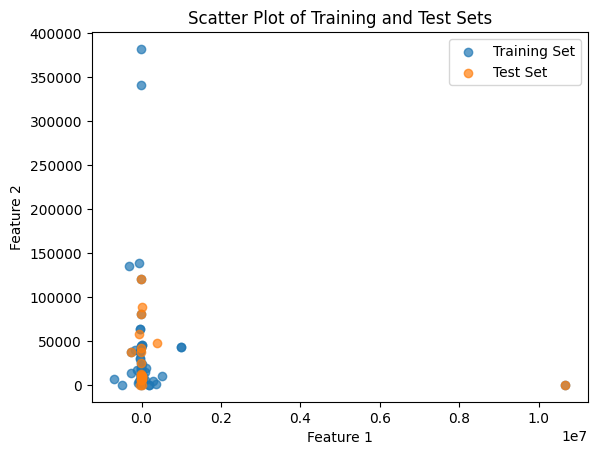

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train and X_test have two features each

# Extract the first two features from each dataset
X_train_1, X_train_2 = X_train[:, 0], X_train[:, 1]
X_test_1, X_test_2 = X_test[:, 0], X_test[:, 1]

# Create the scatter plot
plt.scatter(X_train_1, X_train_2, label='Training Set', alpha=0.7)
plt.scatter(X_test_1, X_test_2, label='Test Set', alpha=0.7)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Training and Test Sets')

# Add legend
plt.legend()

# Show the plot
plt.show()


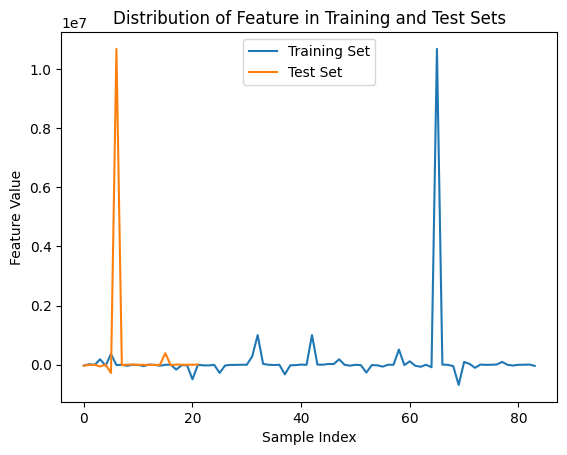

In [ ]:
import matplotlib.pyplot as plt

# Choose a feature to visualize (replace with index for your desired feature)
feature_index = 0

# Extract the chosen feature from each dataset
feature_train = X_train[:, feature_index]
feature_test = X_test[:, feature_index]

# Create line plots
plt.plot(feature_train, label='Training Set')
plt.plot(feature_test, label='Test Set')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.title('Distribution of Feature in Training and Test Sets')

# Add legend
plt.legend()

# Show the plot
plt.show()


Number of samples in X: 106
Number of samples in y: 106


Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Model accuracy: 1.0


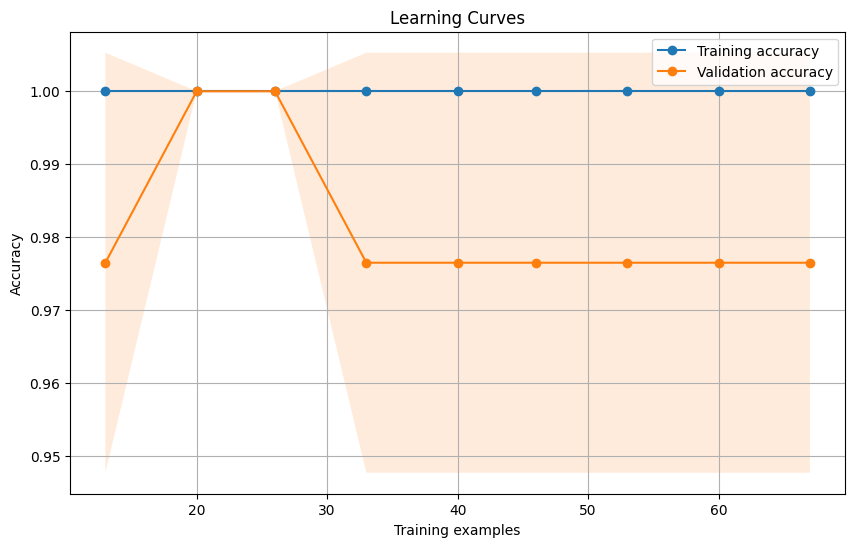

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Seleccionar las columnas necesarias en el DataFrame Spark
X_spark = df[['arriveDifference', 'departureDifference', 'onTimeDeparture', 'avg_speed', 'distance']]

# Convertir el DataFrame Spark a un DataFrame de pandas
X_pd = X_spark.to_pandas()

# Seleccionar la columna target en el DataFrame Spark
y_spark = df['onTimeArrival']

# Convertir el DataFrame Spark a una Serie de pandas
y_pd = y_spark.to_pandas()

# Check the number of samples in X and y
print("Number of samples in X:", X_pd.shape[0])
print("Number of samples in y:", y_pd.shape[0])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

# Define a function to plot learning curves
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
    plt.plot(train_sizes, test_mean, label='Validation accuracy', marker='o')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)
    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves
plot_learning_curves(model, X_train, y_train)


## Conclusion sobre el primer modelo evaluado

En este análisis fue empleado unos de los algoritmos más sencillos y confiables en los problemas de clasificación binaria, podemos concluir que la existe una muy marcada correlación entre los datos y las clases para llegar a este resultado. Este resultado era el esperado debido a que la empresa que proporciono datos no tenía una correcta estrategia de recompilación de los mismos, así que al momento de depurar y conectar las tablas de la base de datos no existía una relación clara entre las instancias de cada una de ellas, así que muchos de los datos quedaron perdidos, sin embargo fue posible extraer un conjunto de datos que cumplen con las características que necesaria para poder ofrecer aplicaciones con la información que contamos.

# Análisis y Evaluación de Modelos de Aprendizaje Automático

Fueron seleccionados 5 algoritmos diferentes en el siguiente bloque de código con el fin de llevar a cabo el análisis y evaluación de modelos de aprendizaje automático, el problema planteado resulta se uno de clasificación binaria, así que fueron seleccionados los algoritmos siguientes:

1. Regresión Logística (Logistic Regression):
    - El enfoque que sigue este modelo es el de emplear una función logística para moldear las probabilidades de que un objeto pertenezca a una de las clases en particular.
2. Perceptrón (Perceptron):
    - Es un algoritmo de aprendizaje supervisado, en el que se ajustan los pesos de cada clase en función de los errores de clasificación, muy útil en casos donde existe desbalance de clases.
3. Árbol de Decisión (Decision Tree):
    - Este algoritmo emplea datos cuantitativos en los que se multiplican los resultados posibles con la probabilidad de que ocurran y sumar los valores para posteriormente restar los pesos costos que determinaran la decisión o resultado de la clasificación, este algoritmo no solo es útil para clasificaciones binarias. 
4. Bosque Aleatorio (Random Forest):
    - Este enfoque consiste en la construcción de múltiples árboles de decisión durante el entrenamiento de los datos, se combinan las predicciones para mejorar la precisión y también lidiar contra el sobre ajuste.
5. XGBoost:
    - Este método utiliza la construcción de árboles de decisión de forma secuencial, pero utiliza una función de perdida centrada en las instancias mal clasificadas para evitar el sobre ajuste.

Los pasos que seguimos para la ejecución fue la siguiente:
1. Iniciamos con la importación de las librerías o bibliotecas necesarias.
2. Preparación de los datos en DataFrame de Spark a un DataFrame de Pandas.
3. Seguimos con la división de los conjuntos de datos, de los que empleamos un 20% de validación y 80% para pruebas.
4. Definición de los modelos mencionados anteriormente y el entrenamiento de datos.
5. Predicción y evaluación sobre el conjunto de pruebas para cada modelo, empleando la métrica "Accuracy" o Precisión de scikit-learn.
6. Visualización de resultados en una gráfica de curva de aprendizaje.



Number of samples in X: 106
Number of samples in y: 106


Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Logistic Regression accuracy: 1.0
Perceptron accuracy: 0.7272727272727273
Decision Tree accuracy: 1.0
Random Forest accuracy: 1.0
XGBoost accuracy: 1.0


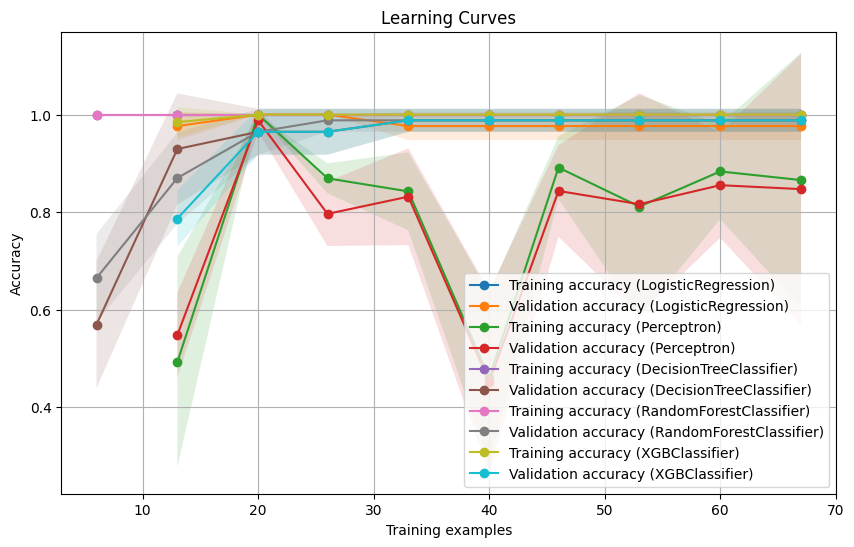

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb
import pyspark.pandas as ps

# Convertir Spark DataFrame a PySpark DataFrame (si es factible)
df_pyspark = ps.DataFrame(data_frame)

# Seleccionar X y y desde PySpark DataFrame
X_spark = df_pyspark[['arriveDifference', 'departureDifference', 'onTimeDeparture', 'avg_speed', 'distance']]
y_spark = df_pyspark['onTimeArrival']

# Convertir PySpark DataFrame a Pandas DataFrame
X_pd = X_spark.to_pandas()
y_pd = y_spark.to_pandas()

# Imprimir el número de muestras en X e y para verificar la consistencia de los datos
print("Number of samples in X:", X_pd.shape[0])
print("Number of samples in y:", y_pd.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2, random_state=42)

# IInicializar y entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Inicializar y entrenar el modelo de perceptrón
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)

# Inicializar y entrenar el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Inicializar y entrenar el modelo de bosque aleatorio
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Inicializar y entrenar el modelo XGBoost
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba para cada modelo
logistic_pred = logistic_model.predict(X_test)
perceptron_pred = perceptron_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
xgboost_pred = xgboost_model.predict(X_test)

# Calcular la precisión para cada modelo
logistic_accuracy = accuracy_score(y_test, logistic_pred)
perceptron_accuracy = accuracy_score(y_test, perceptron_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
xgboost_accuracy = accuracy_score(y_test, xgboost_pred)

print("Logistic Regression accuracy:", logistic_accuracy)
print("Perceptron accuracy:", perceptron_accuracy)
print("Decision Tree accuracy:", decision_tree_accuracy)
print("Random Forest accuracy:", random_forest_accuracy)
print("XGBoost accuracy:", xgboost_accuracy)

# Definir una función para trazar curvas de aprendizaje
def plot_learning_curves(models, X, y):
    plt.figure(figsize=(10, 6))
    
    for model in models:
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, train_mean, label=f'Training accuracy ({type(model).__name__})', marker='o')
        plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
        plt.plot(train_sizes, test_mean, label=f'Validation accuracy ({type(model).__name__})', marker='o')
        plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)

    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Definir modelos para trazar
models = [LogisticRegression(), Perceptron(), DecisionTreeClassifier(), RandomForestClassifier(), xgb.XGBClassifier()]

# Graficar curvas de aprendizaje para todos los modelos
plot_learning_curves(models, X_train, y_train)



## Conclusiones sobre la aplicación de diversos algoritmos

Actualmente se cuenta con entorno de ejecución de las pruebas proporcionado por la empresa que brindo los datos, en el se tiene un clúster dedicado en un servidor de Azure con Databrick que cuenta con 28 GB de memoria y 8 núcleos de procesamiento de información, por esta razón el tiempo de ejecución del entrenamiento de nuestros modelos se realizó en 55 segundos, al ser un modelo de clasificación binaria y no representar altos costos en cuanto al procesamiento cualquiera de los algoritmos analizados resulta ser factible en términos de costo por entrenamiento y tiempo de ejecución

Tras observar los resultados obtenidos por cada uno delos modelos en términos de precisión para el problema de clasificación binaria, notamos que los resultados en su mayoría han sido altamente precisos logrando una perfecta clasificación con los algoritmos Regresión Logística, Árbol de decisión, Random Forest y XGBoost, mientras que el algoritmo Perceptrón logro una menor precisión de 0.73

En el caso de los modelos Random Forest, Decision Tree y XGBoost, resultan ser muy buenos al momento de extraer relaciones complejas entre los datos, son eficientes en grandes conjuntos de datos, permiten hace mejores predicciones y resultan adecuados en gran variedad de problemas de clasificación, sin embargo a pesar de todas estas ventajas encontramos que el modelo de Regresión Logística también alcanzó una precisión perfecta al momento de ser evaluado y debido a que nuestros datos están fuertemente correlacionados y cuentan con una relación lineal sugieren que podría ser nuestra opción más viable, especialmente debido al estado actual de los datos que se cuentan esta etapa inicial del proyecto y análisis, ya que es un algoritmo mas simple, eficiente y confiable.